<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/Distributions_based_on_confidence_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Code

In [ ]:
from google.colab import drive #this module allows us to access files on google drive
drive.mount('/content/gdrive') #you will need to authorize access using your google account. Follow the instructions that appear below
import pandas as pd #this allows us to use structures like Dataframes
import matplotlib.pyplot as plt #this is our plotting package
import numpy as np #this allows us to do math with arrays easier

#add additional packages below this comment
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

#The packages below are needed to install Basemap to create map projections
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

#Imports Basemap
from mpl_toolkits.basemap import Basemap as bm
#The line below allows for graphs and plots to be posted with code in the notebook
%matplotlib inline

Mounted at /content/gdrive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     - 133.1 MB 176 kB/s
     |████████████████████████████████| 6.3 MB 5.2 MB/s 
     |████████████████████████████████| 219 kB 28.4 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759607 sha256=95206e30e76f6999bf0d77cb5a20ff18da564f249db8ba35368044a3bc48c5d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4cyvd9k9/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filena

     |████████████████████████████████| 2.8 MB 5.2 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702480 sha256=56a9b8adb037291d2705561732a42f9a4330a11166208049c90b730872e40acd
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


In [ ]:
#The line below reads in a dataframe from a python native storage file format called pkl (pronounced "pickle")
Fa19PolarLows_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/Fall2019PolarLowsClean.pkl")
Sp20PolarLows_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/Spring2020PolarLowsClean.pkl")
Sp21PolarLows_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/Spring2021PolarLowsClean.pkl")

# Spatial Distributions based on Confidence Level

## Adjusting Column Names and Adding Central Lat/Long

In [ ]:
#Fall 2019
Fa19PolarLows_df = Fa19PolarLows_df.rename(columns={"Your Last Name":"Last Name", 
                                 "date of Polar Low Occurance": "Date",
                                 "How confident are you that this is actually a polar low [1 for low, 2 for high]" : "Confidence",
                                 "latitude of box top": "Top Latitude",
                                 "longitude of box right side": "Right Longitude",
                                 "latitude of box bottom":"Bot Latitude",
                                 "longitude of box left side": "Left Longitude",
                                 "file name of PNG": "File Name"})
Fa19PolarLows_df['Top Latitude']= pd.to_numeric(Fa19PolarLows_df['Top Latitude'], downcast="float")
Fa19PolarLows_df['Bot Latitude']= pd.to_numeric(Fa19PolarLows_df['Bot Latitude'], downcast="float")
Fa19PolarLows_df['Left Longitude']= pd.to_numeric(Fa19PolarLows_df['Left Longitude'], downcast="float")
Fa19PolarLows_df['Right Longitude']= pd.to_numeric(Fa19PolarLows_df['Right Longitude'], downcast="float")
Fa19PolarLows_df['Confidence']= pd.to_numeric(Fa19PolarLows_df['Confidence'], downcast="float")
top_lat_prev = Fa19PolarLows_df['Top Latitude']
bot_lat_prev = Fa19PolarLows_df['Bot Latitude']
Fa19PolarLows_df.insert(4, 'Central Latitude', (top_lat_prev + bot_lat_prev) / 2.0)
left_long_prev = Fa19PolarLows_df['Left Longitude']
right_long_prev = Fa19PolarLows_df['Right Longitude']
Fa19PolarLows_df.insert(4, 'Central Longitude', (left_long_prev + right_long_prev) / 2)

In [ ]:
#Spring 2020
Sp20PolarLows_df = Sp20PolarLows_df.rename(columns={"your last name":"Last Name", 
                                 "date of Polar Low Occurance": "Date",
                                 "How confident are you that this is actually a polar low [1 for low, 2 for high]" : "Confidence",
                                 "latitude of box top": "Top Latitude",
                                 "longitude of box right side": "Right Longitude",
                                 "latitude of box bottom":"Bot Latitude",
                                 "longitude of box left side": "Left Longitude",
                                 "file name of PNG": "File Name"})
Sp20PolarLows_df['Top Latitude']= pd.to_numeric(Sp20PolarLows_df['Top Latitude'], downcast="float")
Sp20PolarLows_df['Bot Latitude']= pd.to_numeric(Sp20PolarLows_df['Bot Latitude'], downcast="float")
Sp20PolarLows_df['Left Longitude']= pd.to_numeric(Sp20PolarLows_df['Left Longitude'], downcast="float")
Sp20PolarLows_df['Right Longitude']= pd.to_numeric(Sp20PolarLows_df['Right Longitude'], downcast="float")
Sp20PolarLows_df['Confidence'] = pd.to_numeric(Sp20PolarLows_df['Confidence'], downcast="float")
top_lat_upd = Sp20PolarLows_df['Top Latitude']
bot_lat_upd = Sp20PolarLows_df['Bot Latitude']
Sp20PolarLows_df.insert(4, 'Central Latitude', (top_lat_upd + bot_lat_upd) / 2.0)
left_long_upd = Sp20PolarLows_df['Left Longitude']
right_long_upd = Sp20PolarLows_df ['Right Longitude']
Sp20PolarLows_df.insert(4, 'Central Longitude', (left_long_upd + right_long_upd) / 2.0)

In [ ]:
#Spring 2021
Sp21PolarLows_df = Sp21PolarLows_df.rename(columns={"your last name":"Last Name", 
                                 "date of Polar Low Occurance": "Date",
                                 "How confident are you that this is actually a polar low [1 for low, 2 for high, 0 for definitely not a polar low]" : "Confidence",
                                 "latitude of box top": "Top Latitude",
                                 "longitude of box right side": "Right Longitude",
                                 "latitude of box bottom":"Bot Latitude",
                                 "longitude of box left side": "Left Longitude",
                                 "file name of PNG": "File Name"})
Sp21PolarLows_df['Top Latitude']= pd.to_numeric(Sp21PolarLows_df['Top Latitude'], downcast="float")
Sp21PolarLows_df['Bot Latitude']= pd.to_numeric(Sp21PolarLows_df['Bot Latitude'], downcast="float")
Sp21PolarLows_df['Left Longitude']= pd.to_numeric(Sp21PolarLows_df['Left Longitude'], downcast="float")
Sp21PolarLows_df['Right Longitude']= pd.to_numeric(Sp21PolarLows_df['Right Longitude'], downcast="float")
Sp21PolarLows_df['Confidence'] = pd.to_numeric(Sp21PolarLows_df['Confidence'], downcast="float")
top_lat_upd = Sp21PolarLows_df['Top Latitude']
bot_lat_upd = Sp21PolarLows_df['Bot Latitude']
Sp21PolarLows_df.insert(4, 'Central Latitude', (top_lat_upd + bot_lat_upd) / 2.0)
left_long_upd = Sp21PolarLows_df['Left Longitude']
right_long_upd = Sp21PolarLows_df ['Right Longitude']
Sp21PolarLows_df.insert(4, 'Central Longitude', (left_long_upd + right_long_upd) / 2.0)

## Filtering Main DataFrames by latitude and by confidence

Separating confidence level by either 1 or 2, and ignoring 0

In [ ]:
Fa19_filtered = Fa19PolarLows_df[(Fa19PolarLows_df['Central Latitude'] <= -40) | (Fa19PolarLows_df['Central Latitude'] >= 40)]
Fa19_confidence_one = Fa19_filtered[Fa19_filtered['Confidence'] == 1]
Fa19_confidence_two = Fa19_filtered[Fa19_filtered['Confidence'] == 2]

In [ ]:
Sp20_filtered = Sp20PolarLows_df[(Sp20PolarLows_df['Central Latitude'] <= -40) | (Sp20PolarLows_df['Central Latitude'] >= 40)]
Sp20_confidence_one = Sp20_filtered[Sp20_filtered['Confidence'] == 1]
Sp20_confidence_two = Sp20_filtered[Sp20_filtered['Confidence']==2]

In [ ]:
#Filtering spring 2021
Sp21_filtered = Sp21PolarLows_df[(Sp21PolarLows_df['Central Latitude'] <= -40) | (Sp21PolarLows_df['Central Latitude'] >= 40)]
Sp21_confidence_one = Sp21_filtered[Sp21_filtered['Confidence'] == 1]
Sp21_confidence_two = Sp21_filtered[Sp21_filtered['Confidence'] == 2]

## Scatter Plots

Scatter Plot of Fall 2019 Polar Lows, color coded by confidence level

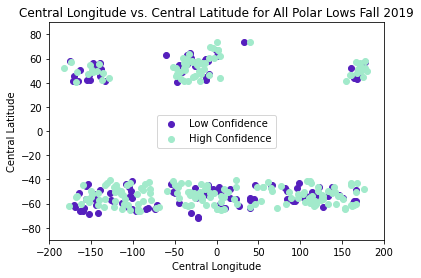

In [ ]:
plt.scatter(Fa19_confidence_one['Central Longitude'], Fa19_confidence_one['Central Latitude'], color = '#551fbd', label = "Low Confidence")
plt.scatter(Fa19_confidence_two['Central Longitude'], Fa19_confidence_two['Central Latitude'], color='#a2eacb', label = "High Confidence")
plt.xlim(-200,200)
plt.ylim(-90, 90)
plt.title('Central Longitude vs. Central Latitude for All Polar Lows Fall 2019')
plt.xlabel('Central Longitude')
plt.ylabel('Central Latitude')
plt.legend(loc='center')
plt.show()

Scatter Plot of Spring 2020 Polar Lows based on Confidence Level

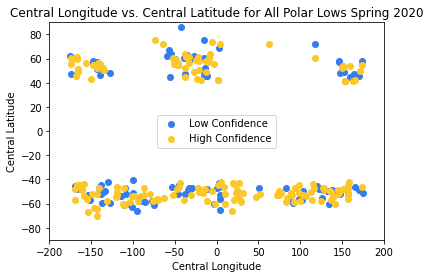

In [ ]:
plt.scatter(Sp20_confidence_one['Central Longitude'], Sp20_confidence_one['Central Latitude'], color = '#337def', label = "Low Confidence")
plt.scatter(Sp20_confidence_two['Central Longitude'], Sp20_confidence_two['Central Latitude'], color='#fcc729', label = "High Confidence")
plt.xlim(-200,200)
plt.ylim(-90, 90)
plt.title('Central Longitude vs. Central Latitude for All Polar Lows Spring 2020')
plt.xlabel('Central Longitude')
plt.ylabel('Central Latitude')
plt.legend(loc='center')
plt.show()

Scatter Plot for Spring 2021 Data based on confidence Level

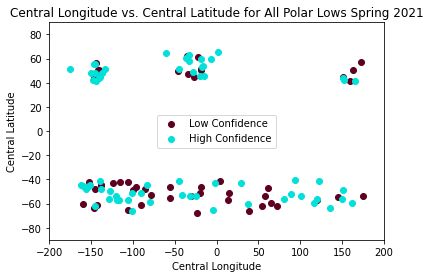

In [ ]:
plt.scatter(Sp21_confidence_one['Central Longitude'], Sp21_confidence_one['Central Latitude'], color = '#5e001f', label = "Low Confidence")
plt.scatter(Sp21_confidence_two['Central Longitude'], Sp21_confidence_two['Central Latitude'], color='#00e1d9', label = "High Confidence")
plt.xlim(-200,200)
plt.ylim(-90, 90)
plt.title('Central Longitude vs. Central Latitude for All Polar Lows Spring 2021')
plt.xlabel('Central Longitude')
plt.ylabel('Central Latitude')
plt.legend(loc='center')
plt.show()

## Projections

Separating arctic into confidence levels

In [ ]:
#combining longitude and latitude dataframes into one
Polar_Combined = pd.concat([Fa19PolarLows_df, Sp20PolarLows_df, Sp21PolarLows_df])
Arctic = Polar_Combined[Polar_Combined['Central Latitude'] >= 40]
Arctic_conf_one = Arctic[Arctic['Confidence'] == 1]
Arctic_conf_two = Arctic[Arctic['Confidence'] == 2]

Projection of North Pole based on confidence level

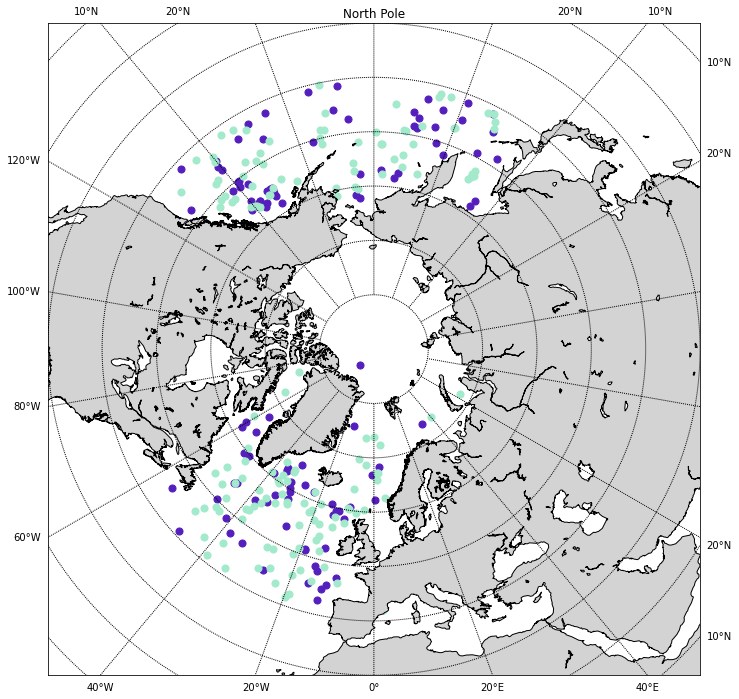

In [ ]:
plt.figure(figsize=(12, 12))
northPole = bm(projection='npaeqd', boundinglat = 30, lon_0 = 0, resolution='l')
northPole.drawcoastlines()
northPole.fillcontinents(color='lightgray')
northPole.drawmeridians(range(0, 360, 20), labels=[1,0,0,1])
northPole.drawparallels(range(-90, 100, 10), labels=[0,1,1,0])
plt.title('North Pole')

x_one, y_one = northPole(np.array(Arctic_conf_one['Central Longitude']), np.array(Arctic_conf_one['Central Latitude']))
x_two, y_two = northPole(np.array(Arctic_conf_two['Central Longitude']), np.array(Arctic_conf_two['Central Latitude']))

plt.scatter(x_one, y_one, color = '#551fbd', s = 50)
plt.scatter(x_two, y_two, color = '#a2eacb', s = 50)


Separating Antarctic into confidence levels

In [ ]:
Antarctic = Polar_Combined[Polar_Combined['Central Latitude'] <= 40]
Antarctic_conf_one = Antarctic[Antarctic['Confidence'] == 1]
Antarctic_conf_two = Antarctic[Antarctic['Confidence'] == 2]

Projection of south pole with confidence levels

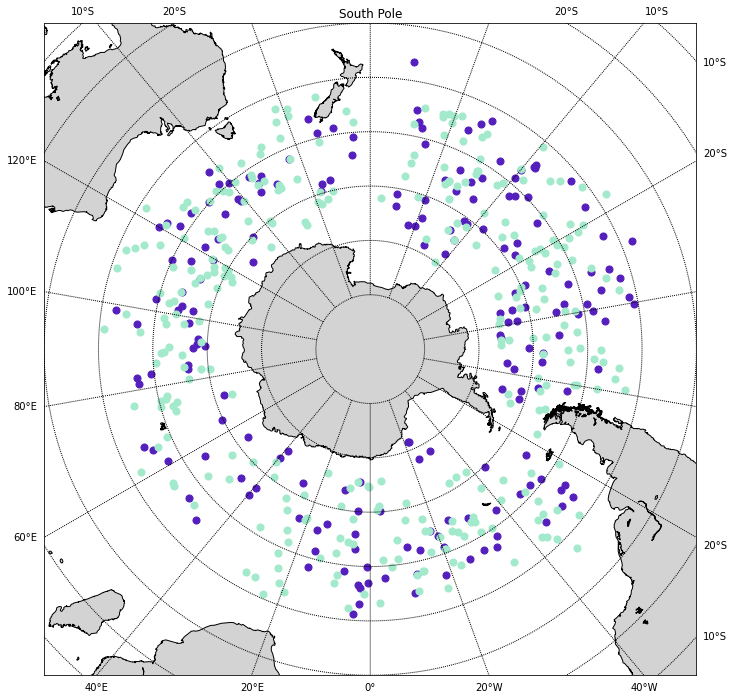

In [ ]:
plt.figure(figsize=(12, 12))
southPole = bm(projection = 'spaeqd', boundinglat = -30, lon_0 = 0, resolution = 'l')
southPole.drawcoastlines()
southPole.fillcontinents(color='lightgray')
southPole.drawmeridians(range(0, 360, 20), labels=[1,0,0,1])
southPole.drawparallels(range(-90, 100, 10), labels=[0,1,1,0])
plt.title('South Pole')

x_one, y_one = southPole(np.array(Antarctic_conf_one['Central Longitude']), np.array(Antarctic_conf_one['Central Latitude']))
x_two, y_two = southPole(np.array(Antarctic_conf_two['Central Longitude']), np.array(Antarctic_conf_two['Central Latitude']))

plt.scatter(x_one, y_one, color = '#551fbd', s = 50)
plt.scatter(x_two, y_two, color = '#a2eacb', s = 50)

# Temporal Distributions based on Confidence Level

## Dividing Data into Subsets

In [ ]:
#Subsets for Fall 2019 based on region and confidence level
AntarcticSubset_Fa19 = Fa19PolarLows_df[Fa19PolarLows_df['Top Latitude'] <= 40]
Antarctic_Fa19_con1 = AntarcticSubset_Fa19[AntarcticSubset_Fa19['Confidence']==1]
Antarctic_Fa19_con2 = AntarcticSubset_Fa19[AntarcticSubset_Fa19['Confidence']==2]
ArcticSubset_Fa19 = Fa19PolarLows_df[Fa19PolarLows_df['Top Latitude'] >= -40]
ArcticFa19_con1 = ArcticSubset_Fa19[ArcticSubset_Fa19['Confidence']==1]
ArcticFa19_con2 = ArcticSubset_Fa19[ArcticSubset_Fa19['Confidence']==2]

In [ ]:
#Subsets for Spring 2020 based on region and confidence level
AntarcticSubset_Sp20 = Sp20PolarLows_df[Sp20PolarLows_df['Top Latitude']<=40]
Antarctic_Sp20_con1 = AntarcticSubset_Sp20[AntarcticSubset_Sp20['Confidence']==1]
Antarctic_Sp20_con2 = AntarcticSubset_Sp20[AntarcticSubset_Sp20['Confidence']==2]
ArcticSubset_Sp20 = Sp20PolarLows_df[Sp20PolarLows_df['Top Latitude']<=-40]
Arctic_Sp20_con1 = ArcticSubset_Sp20[ArcticSubset_Sp20['Confidence']==1]
Arctic_Sp20_con2 = ArcticSubset_Sp20[ArcticSubset_Sp20['Confidence']==2]

In [ ]:
#Subsets for Spring 2021 based on region and confidence level
AntarcticSubset_Sp21 = Sp21PolarLows_df[Sp21PolarLows_df['Top Latitude']>=40]
Antarctic_Sp21_con1 = AntarcticSubset_Sp21[AntarcticSubset_Sp21['Confidence']==1]
Antarctic_Sp21_con2 = AntarcticSubset_Sp21[AntarcticSubset_Sp21['Confidence']==2]
ArcticSubset_Sp21 = Sp21PolarLows_df[Sp21PolarLows_df['Top Latitude']<=-40]
Arctic_Sp21_con1 = ArcticSubset_Sp21[ArcticSubset_Sp21['Confidence']==1]
Arctic_Sp21_con2 = ArcticSubset_Sp21[ArcticSubset_Sp21['Confidence']==2]

In [ ]:
#Doing the same by combining the polar lows into one dataframe
Antarctic_con1 = pd.concat([Antarctic_Fa19_con1, Antarctic_Sp20_con1, Antarctic_Sp21_con1])
Antarctic_con2 = pd.concat([Antarctic_Fa19_con2, Antarctic_Sp20_con2, Antarctic_Sp21_con2])
Arctic_con1 = pd.concat([ArcticFa19_con1, Arctic_Sp20_con1, Arctic_Sp21_con1])
Arctic_con2 = pd.concat([ArcticFa19_con2, Arctic_Sp20_con2, Arctic_Sp21_con2])

## Creating Histograms

In [ ]:
#Convert to datetime
Antarctic_con1['Date'] = pd.to_datetime(Antarctic_con1['Date'])
Antarctic_con2['Date'] = pd.to_datetime(Antarctic_con2['Date'])
Arctic_con1['Date'] = pd.to_datetime(Arctic_con1['Date'])
Arctic_con2['Date'] = pd.to_datetime(Arctic_con2['Date'])

In [ ]:
#Create bins
Antarctic1X = Antarctic_con1.groupby(Antarctic_con1['Date'].dt.month)
Antarctic2X = Antarctic_con2.groupby(Antarctic_con2['Date'].dt.month)
Arctic1X = Arctic_con1.groupby(Arctic_con1['Date'].dt.month)
Arctic2X = Arctic_con2.groupby(Arctic_con2['Date'].dt.month)

In [ ]:
import calendar

In [ ]:
#Normalize Antarctic1X
Antarctic1X_monthly = [0]*12
for i in Antarctic1X.groups.keys(): # this gets the scaled amount of polar lows for every month and prints them inside the for loop
  amountOfPolarLows = len(Antarctic1X.get_group(i)) # the amount of polar lows that occurred within a month is the length of the group
  dateGroup = Antarctic1X.get_group(i)['Date'] # Get date group (column)
  firstDate = dateGroup.nsmallest(1) # first date of date group, mainly to extract month & year
  lastDate = dateGroup.nlargest(1) # last date of date group
  daysInMonth = calendar.monthrange(firstDate[firstDate.keys()[0]].year, firstDate[firstDate.keys()[0]].month)[1] # Finds the number of days in the month.
  numYears = lastDate[lastDate.keys()[0]].year - firstDate[firstDate.keys()[0]].year + 1 # Finding the number of years
  scaledNumPolarLows = (amountOfPolarLows/daysInMonth) * 30 # Scaling polar lows, normalizing each month to have 30 days
  Antarctic1X_monthly[firstDate[firstDate.keys()[0]].month-1] = scaledNumPolarLows/numYears # Dividing the scaled polar lows by number of years

In [ ]:
#Normalize Antarctic2X
Antarctic2X_monthly = [0]*12
for i in Antarctic1X.groups.keys(): # this gets the scaled amount of polar lows for every month and prints them inside the for loop
  amountOfPolarLows = len(Antarctic2X.get_group(i)) # the amount of polar lows that occurred within a month is the length of the group
  dateGroup = Antarctic2X.get_group(i)['Date'] # Get date group (column)
  firstDate = dateGroup.nsmallest(1) # first date of date group, mainly to extract month & year
  lastDate = dateGroup.nlargest(1) # last date of date group
  daysInMonth = calendar.monthrange(firstDate[firstDate.keys()[0]].year, firstDate[firstDate.keys()[0]].month)[1] # Finds the number of days in the month.
  numYears = lastDate[lastDate.keys()[0]].year - firstDate[firstDate.keys()[0]].year + 1 # Finding the number of years
  scaledNumPolarLows = (amountOfPolarLows/daysInMonth) * 30 # Scaling polar lows, normalizing each month to have 30 days
  Antarctic2X_monthly[firstDate[firstDate.keys()[0]].month-1] = scaledNumPolarLows/numYears # Dividing the scaled polar lows by number of years

In [ ]:
#Normalize Arctic1X
Arctic1X_monthly = [0]*12
for i in Arctic1X.groups.keys(): # this gets the scaled amount of polar lows for every month and prints them inside the for loop
  amountOfPolarLows = len(Arctic1X.get_group(i)) # the amount of polar lows that occurred within a month is the length of the group
  dateGroup = Arctic1X.get_group(i)['Date'] # Get date group (column)
  firstDate = dateGroup.nsmallest(1) # first date of date group, mainly to extract month & year
  lastDate = dateGroup.nlargest(1) # last date of date group
  daysInMonth = calendar.monthrange(firstDate[firstDate.keys()[0]].year, firstDate[firstDate.keys()[0]].month)[1] # Finds the number of days in the month.
  numYears = lastDate[lastDate.keys()[0]].year - firstDate[firstDate.keys()[0]].year + 1 # Finding the number of years
  scaledNumPolarLows = (amountOfPolarLows/daysInMonth) * 30 # Scaling polar lows, normalizing each month to have 30 days
  Arctic1X_monthly[firstDate[firstDate.keys()[0]].month-1] = scaledNumPolarLows/numYears # Dividing the scaled polar lows by number of years

In [ ]:
#Normalize Arctic2X
Arctic2X_monthly = [0]*12
for i in Arctic2X.groups.keys(): # this gets the scaled amount of polar lows for every month and prints them inside the for loop
  amountOfPolarLows = len(Arctic2X.get_group(i)) # the amount of polar lows that occurred within a month is the length of the group
  dateGroup = Arctic2X.get_group(i)['Date'] # Get date group (column)
  firstDate = dateGroup.nsmallest(1) # first date of date group, mainly to extract month & year
  lastDate = dateGroup.nlargest(1) # last date of date group
  daysInMonth = calendar.monthrange(firstDate[firstDate.keys()[0]].year, firstDate[firstDate.keys()[0]].month)[1] # Finds the number of days in the month.
  numYears = lastDate[lastDate.keys()[0]].year - firstDate[firstDate.keys()[0]].year + 1 # Finding the number of years
  scaledNumPolarLows = (amountOfPolarLows/daysInMonth) * 30 # Scaling polar lows, normalizing each month to have 30 days
  Arctic2X_monthly[firstDate[firstDate.keys()[0]].month-1] = scaledNumPolarLows/numYears # Dividing the scaled polar lows by number of years

In [ ]:
Antarctic1XNormalizeData={"Month":['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']}
AntarcticNormalize1XDF=pd.DataFrame(Antarctic1XNormalizeData)
Antarctic2XNormalizeData={"Month":['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']}
AntarcticNormalize2XDF=pd.DataFrame(Antarctic2XNormalizeData)

Arctic1XNormalizeData={"Month":['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']}
ArcticNormalize1XDF=pd.DataFrame(Arctic1XNormalizeData)
Arctic2XNormalizeData={"Month":['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']}
ArcticNormalize2XDF=pd.DataFrame(Arctic2XNormalizeData)

In [ ]:
AntarcticNormalize1XDF["Normalized Antarctic Low Confidence"]=Antarctic1X_monthly
AntarcticNormalize2XDF["Normalized Antarctic High Confidence"]=Antarctic2X_monthly
ArcticNormalize1XDF["Normalized Arctic Low Confidence"] = Arctic1X_monthly
ArcticNormalize2XDF["Normalized Arctic High Confidence"] = Arctic2X_monthly

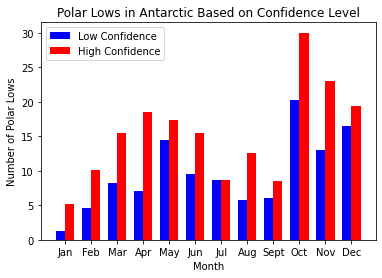

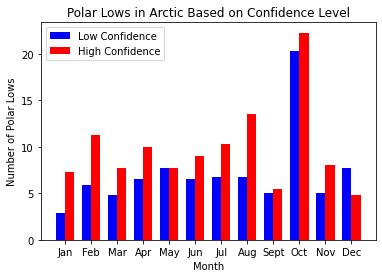

In [ ]:
Month = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Month_axis = np.arange(len(Month))
width=0.35
plt.bar(Month_axis - width/2, AntarcticNormalize1XDF["Normalized Antarctic Low Confidence"], width, color='b', align='center', label='Low Confidence')
plt.bar(Month_axis + width/2, AntarcticNormalize2XDF["Normalized Antarctic High Confidence"], width, color='r', align='center', label='High Confidence' )
plt.xticks(Month_axis, Month)
plt.xlabel("Month")
plt.ylabel("Number of Polar Lows")
plt.legend()
plt.title("Polar Lows in Antarctic Based on Confidence Level")
plt.show()

plt.bar(Month_axis - width/2, ArcticNormalize1XDF["Normalized Arctic Low Confidence"], width, color='b', align='center', label='Low Confidence')
plt.bar(Month_axis + width/2, ArcticNormalize2XDF["Normalized Arctic High Confidence"], width, color='r', align='center', label='High Confidence' )
plt.xticks(Month_axis, Month)
plt.xlabel("Month")
plt.ylabel("Number of Polar Lows")
plt.legend()
plt.title("Polar Lows in Arctic Based on Confidence Level")
plt.show()

## Creating Scatter Plots

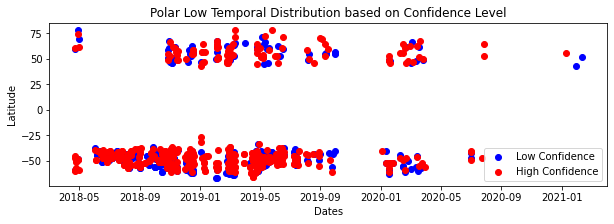

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(Antarctic_con1['Date'], Antarctic_con1['Top Latitude'], color='b', alpha = 0.5)
plt.scatter(Arctic_con1['Date'], Arctic_con1['Top Latitude'], color='b', label = 'Low Confidence')
plt.scatter(Antarctic_con2['Date'], Antarctic_con2['Top Latitude'], color='r', label = 'High Confidence')
plt.scatter(Arctic_con2['Date'], Arctic_con2['Top Latitude'], color ='r', alpha=0.5)
plt.title("Polar Low Temporal Distribution based on Confidence Level")
plt.xlabel("Dates")
plt.ylabel("Latitude")
plt.legend()
plt.show()